In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def convertToRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
#load test image
test1 = cv2.imread('body.jpg')
#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

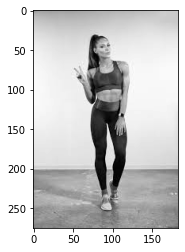

In [ ]:
plt.imshow(gray_img, cmap='gray')

In [ ]:
#load cascade classifier training file for haarcascade
haar_body_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

In [ ]:
bodies = haar_body_cascade.detectMultiScale(gray_img,
                                           scaleFactor=1.1,
                                           minNeighbors=5)

In [ ]:
#go over list of faces and draw them as rectangles on original colored img
#(255, 0, 255): màu tím
#2 độ thanh mảnh của đường line. Số 1 là mảnh nhất.
for (x, y, w, h) in faces:
  cv2.rectangle(test1, (x, y), (x+w, y+h), (255, 0, 255), 2)

(-0.5, 182.5, 274.5, -0.5)

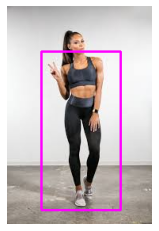

In [ ]:
#convert to RGB and show
plt.imshow(convertToRGB(test1))
plt.axis('off')

In [ ]:
#chuyển thành function
def detect_bodies(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) 

    #let's detect multiscale (some images may be closer to camera than others) images
    bodies = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, 
    minNeighbors=5)   
    bodies_found = len(bodies)

    #go over list of bodies and draw them as rectangles on original colored img
    for (x, y, w, h) in bodies:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 255), 2)

    return img_copy, bodies_found

In [ ]:
#load another image
test2 = cv2.imread('body.jpg')
#call our function to detect bodies
bodies_detected_img, bodies_found = detect_bodies(haar_body_cascade, test2)

(-0.5, 182.5, 274.5, -0.5)

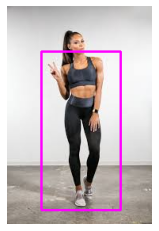

In [ ]:
plt.imshow(convertToRGB(bodies_detected_img))
plt.axis('off')

In [ ]:
#Lưu lại hình ảnh
plt.imsave('body_output.png', convertToRGB(bodies_detected_img))